In [1]:
# Import the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Read the dataset into a data frame
mall = pd.read_csv("Mall Customer Segmentation.zip")
mall.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [3]:
# Drop unnecessary column
mall.drop(columns = "Customer ID", inplace = True)

# Get insight into the data frame
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             15079 non-null  int64 
 1   Gender          15079 non-null  object
 2   Annual Income   15079 non-null  int64 
 3   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 471.3+ KB


In [4]:
# View the data frame
mall.head()

,Age,Gender,Annual Income,Spending Score
0,30,Male,151479,89
1,58,Female,185088,95
2,62,Female,70912,76
3,23,Male,55460,57
4,24,Male,153752,76


In [5]:
# Summarize the data set
mall.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


In [6]:
# Create Age Category column
bins = [0, 34, 44, 54, 64, 74, float("inf")]
labels = ["Under 35", "35-44", "45-54", "55-64", "65-74", "75 or Older"]
mall["AgeCat"] = pd.cut(mall["Age"], bins = bins, labels = labels, right = True)
mall.head()

,Age,Gender,Annual Income,Spending Score,AgeCat
0,30,Male,151479,89,Under 35
1,58,Female,185088,95,55-64
2,62,Female,70912,76,55-64
3,23,Male,55460,57,Under 35
4,24,Male,153752,76,Under 35


In [7]:
# Create Spending Score Category column
# Define the bin edges
bin_edges = [0, 17, 34, 51, 68, 85, 100]

# Define labels for each bin
#labels = ["Very Low", "Low", "Moderate", "High", "Very High", "Top Spender"]
labels = [1, 2, 3, 4, 5, 6]

# Group the score into bins
mall["Spending Score Cat"] = (pd.cut(mall["Spending Score"], bins=bin_edges, labels=labels, include_lowest = True)).astype(int)

mall.head()

,Age,Gender,Annual Income,Spending Score,AgeCat,Spending Score Cat
0,30,Male,151479,89,Under 35,6
1,58,Female,185088,95,55-64,6
2,62,Female,70912,76,55-64,5
3,23,Male,55460,57,Under 35,4
4,24,Male,153752,76,Under 35,5


In [8]:
# Encode Age Category column
mall["Age Category"] = (mall["AgeCat"].map({"Under 35": 1, "35-44": 2, "45-54": 3, "55-64": 4, "65-74": 5, "75 or Older": 6})).astype(int)

mall.head()

,Age,Gender,Annual Income,Spending Score,AgeCat,Spending Score Cat,Age Category
0,30,Male,151479,89,Under 35,6,1
1,58,Female,185088,95,55-64,6,4
2,62,Female,70912,76,55-64,5,4
3,23,Male,55460,57,Under 35,4,1
4,24,Male,153752,76,Under 35,5,1


In [9]:
# Create Annual Income Category column
# Define the bin edges
bins = [0, 33329, 66658, 99987, 133316, 166645, 199975]

# Define labels for each bin
#labels = ["Very Low", "Low", "Moderate", "High", "Very High", "Top Earner"]
labels = [1, 2, 3, 4, 5, 6]

# Group the income into bins
mall["Income Category"] = (pd.cut(mall["Annual Income"], bins= bins, labels=labels, include_lowest=True)).astype(int)

mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 15079 non-null  int64   
 1   Gender              15079 non-null  object  
 2   Annual Income       15079 non-null  int64   
 3   Spending Score      15079 non-null  int64   
 4   AgeCat              15079 non-null  category
 5   Spending Score Cat  15079 non-null  int32   
 6   Age Category        15079 non-null  int32   
 7   Income Category     15079 non-null  int32   
dtypes: category(1), int32(3), int64(3), object(1)
memory usage: 663.0+ KB


In [10]:
# Count the number of age per category
AgeCat_counts = mall["AgeCat"].value_counts()
AgeCat_counts

AgeCat
Under 35       3502
75 or Older    3379
55-64          2065
45-54          2063
65-74          2045
35-44          2025
Name: count, dtype: int64

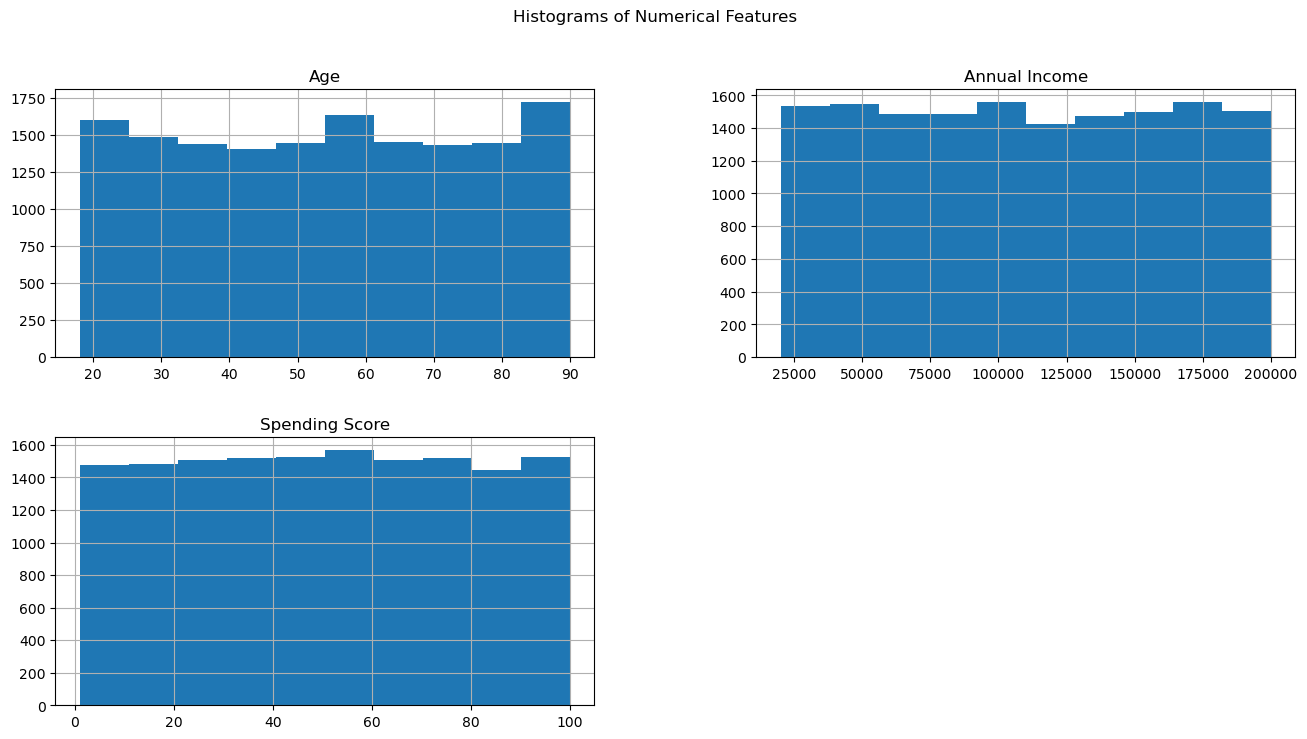

In [11]:
# Numerical Features Distribution
mallNum = mall.select_dtypes(int).drop(columns = ["Spending Score Cat", "Age Category", "Income Category"])
mallNum.hist(bins = 10, figsize = (16, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

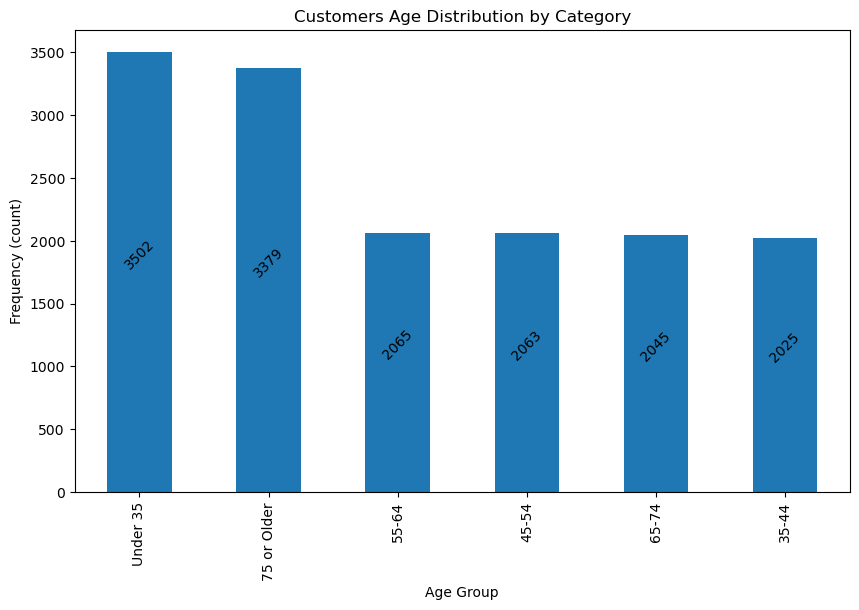

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
# Visualize age category distribution by category
bar = AgeCat_counts.plot(
    kind = "bar",
    xlabel = "Age Group",
    ylabel = "Frequency (count)",
    title = "Customers Age Distribution by Category",
)

bar_width = 0.45

# Get the heights of the bars
height = bar.patches

# Add data labels to the bars
for rect in height:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:}', 
             rotation=45, ha='center', va='bottom')

# Show the plot
plt.show()

In [90]:
# Group by AgeCat and calculate the sum of spending score
age_spendingScore = mall.groupby(["AgeCat"], observed=False)["Spending Score"].sum().round(2)
age_spendingScore.head()

AgeCat
Under 35    177578
35-44       102572
45-54       104541
55-64       105817
65-74       102447
Name: Spending Score, dtype: int64

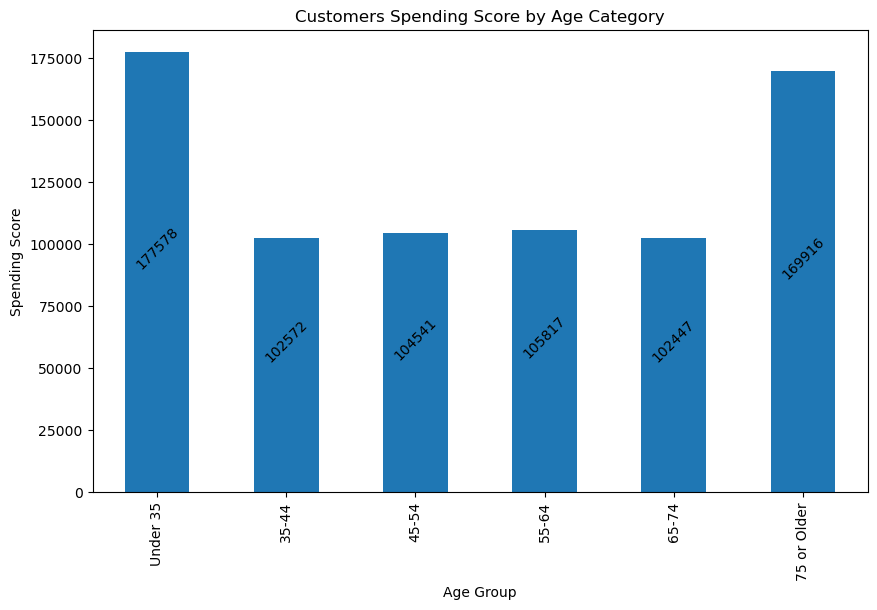

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))
# Visualize age category distribution by spending score
bar = age_spendingScore.plot(
    kind = "bar",
    xlabel = "Age Group",
    ylabel = "Spending Score",
    title = "Customers Spending Score by Age Category",
)

bar_width = 0.45

# Get the heights of the bars
height = bar.patches

# Add data labels to the bars
for rect in height:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:}', 
             rotation=45, ha='center', va='bottom')

# Show the plot
plt.show()

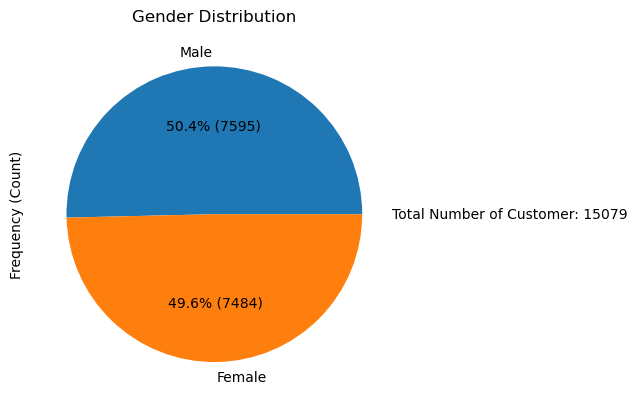

In [93]:
# Count the number of customers per gender
Gender_counts = mall["Gender"].value_counts()

# Plot the counts
Gender_counts.plot(
    kind = "pie",
    xlabel = " ",
    ylabel = "Frequency (Count)",
    title = "Gender Distribution",
    autopct = lambda p: f'{p:.1f}% ({p * Gender_counts.sum()/100:.0f})'
)
total_gendar = Gender_counts.sum()
plt.text(1.2, 0, f'Total Number of Customer: {round(total_gendar, 2)}', verticalalignment = "center"); 

In [94]:
# Gender Analysis by "Annual Income" and "Spending Score"
gender_analysis = mall.groupby("Gender")[["Annual Income", "Spending Score"]].sum()
gender_analysis

,Annual Income,Spending Score
Gender,,
Female,822512552,377176
Male,832300344,385695


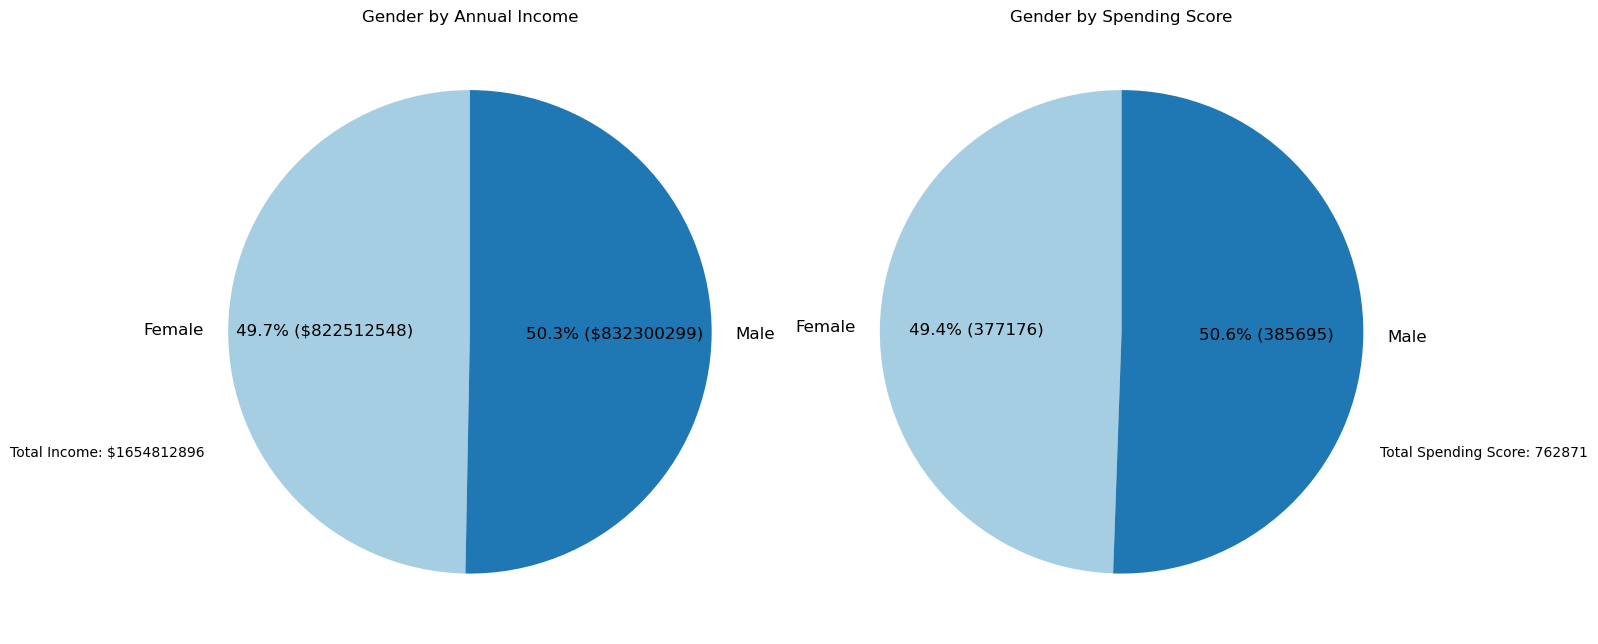

In [95]:
# Create subplots for side-by-side pie charts
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for Annual Income by Gender
ax[0].pie(gender_analysis["Annual Income"], 
            labels = gender_analysis.index,
            autopct = lambda pct: f'{pct:.1f}% (${pct * sum(gender_analysis["Annual Income"])/100:.0f})',
            startangle = 90, 
            colors=plt.cm.Paired.colors,
            textprops={'fontsize': 12})
total_income = sum(gender_analysis["Annual Income"])
ax[0].text(-1.5, -0.5, f'Total Income: ${total_income}', ha='center', va='center')
#total_income = sum(gender_analysis["Annual Income"])
#plt.text(ax[0], -1.2, f'Total Income of all Customers: ${total_income}', verticalalignment = "center")
ax[0].set_title("Gender by Annual Income")

# Pie chart for Spending Score by Gender
ax[1].pie(gender_analysis["Spending Score"], 
            labels = gender_analysis.index, 
            autopct = lambda pct: f'{pct:.1f}% ({pct * sum(gender_analysis["Spending Score"])/100:.0f})',
            startangle = 90, 
            colors=plt.cm.Paired.colors,
            textprops={'fontsize': 12})
total_score = sum(gender_analysis["Spending Score"])
ax[1].text(1.5, -0.5, f'Total Spending Score: {total_score}', ha='center', va='center')
ax[1].set_title("Gender by Spending Score")


# Display the plot
plt.tight_layout()
plt.show()

In [103]:
# Group by AgeCat and calculate the sum of Annual Income
age_annualIncome = mall.groupby(["AgeCat"], observed=False)["Annual Income"].mean().round()
age_annualIncome.head()

AgeCat
Under 35    110150.0
35-44       109093.0
45-54       108489.0
55-64       109064.0
65-74       110928.0
Name: Annual Income, dtype: float64

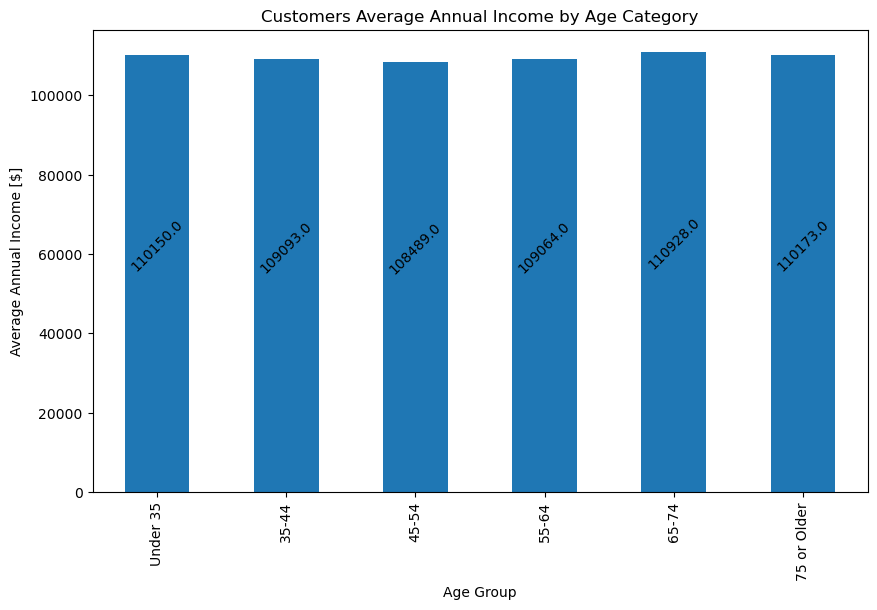

In [104]:
fig, ax = plt.subplots(figsize=(10, 6))
# Visualize age category distribution by average Annual Income
bar = age_annualIncome.plot(
    kind = "bar",
    xlabel = "Age Group",
    ylabel = "Average Annual Income [$]",
    title = "Customers Average Annual Income by Age Category",
)

bar_width = 0.45

# Get the heights of the bars
height = bar.patches

# Add data labels to the bars
for rect in height:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:}', 
             rotation=45, ha='center', va='bottom')

# Show the plot
plt.show()

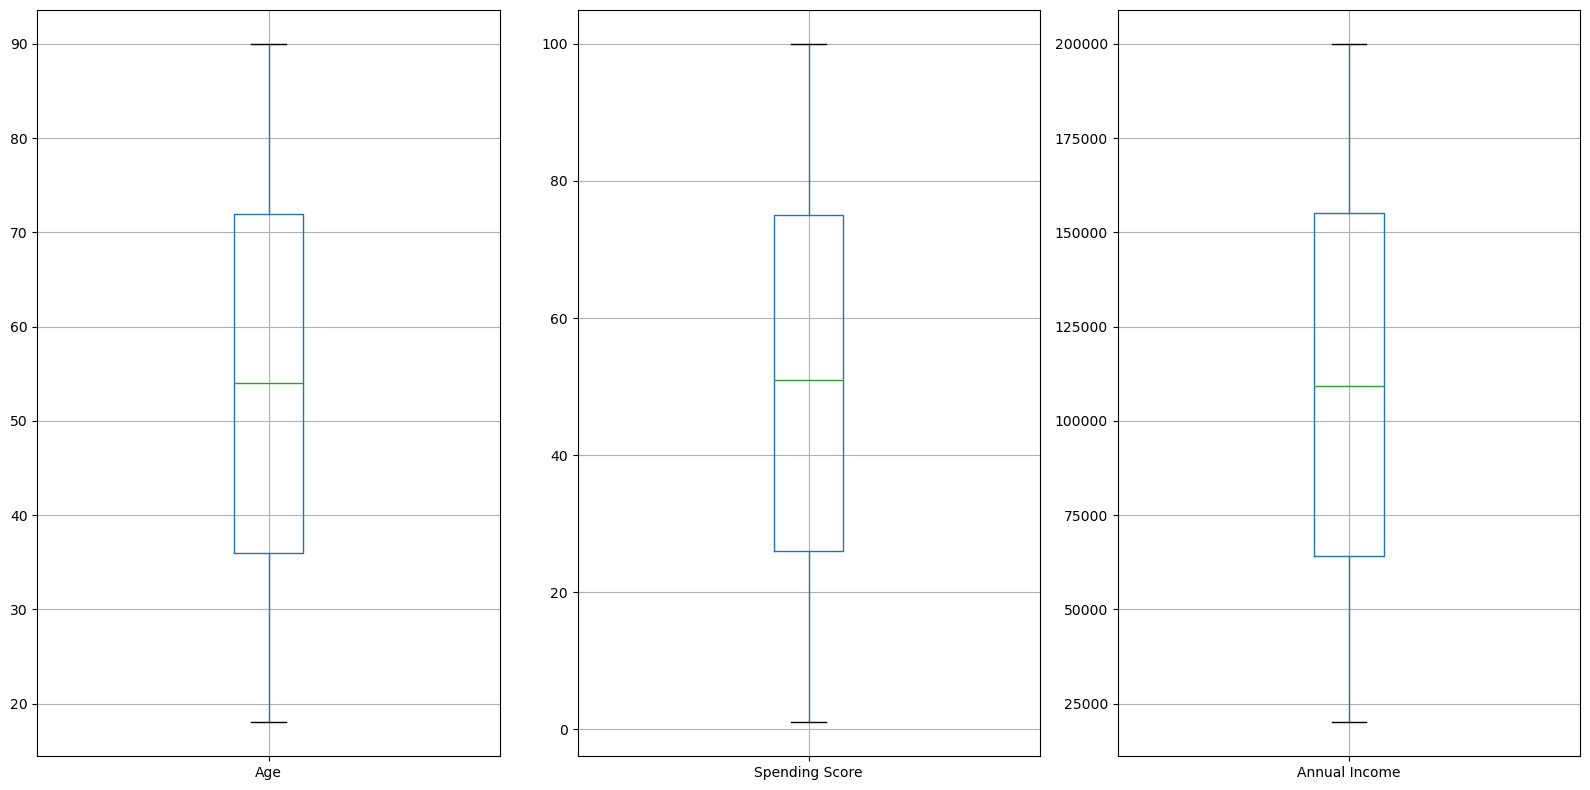

In [44]:
# Box plot for Numerical Features

# Define the needed columns
rmallNum = mallNum[["Age", "Spending Score", "Annual Income"]]

# Create subplots
fig, ax = plt.subplots(1, len(rmallNum.columns), figsize=(16, 8))

# Plot a boxplot for each column
for i, col in enumerate(rmallNum.columns):
    rmallNum.boxplot(column = col, ax = ax[i])

plt.tight_layout()
plt.show()

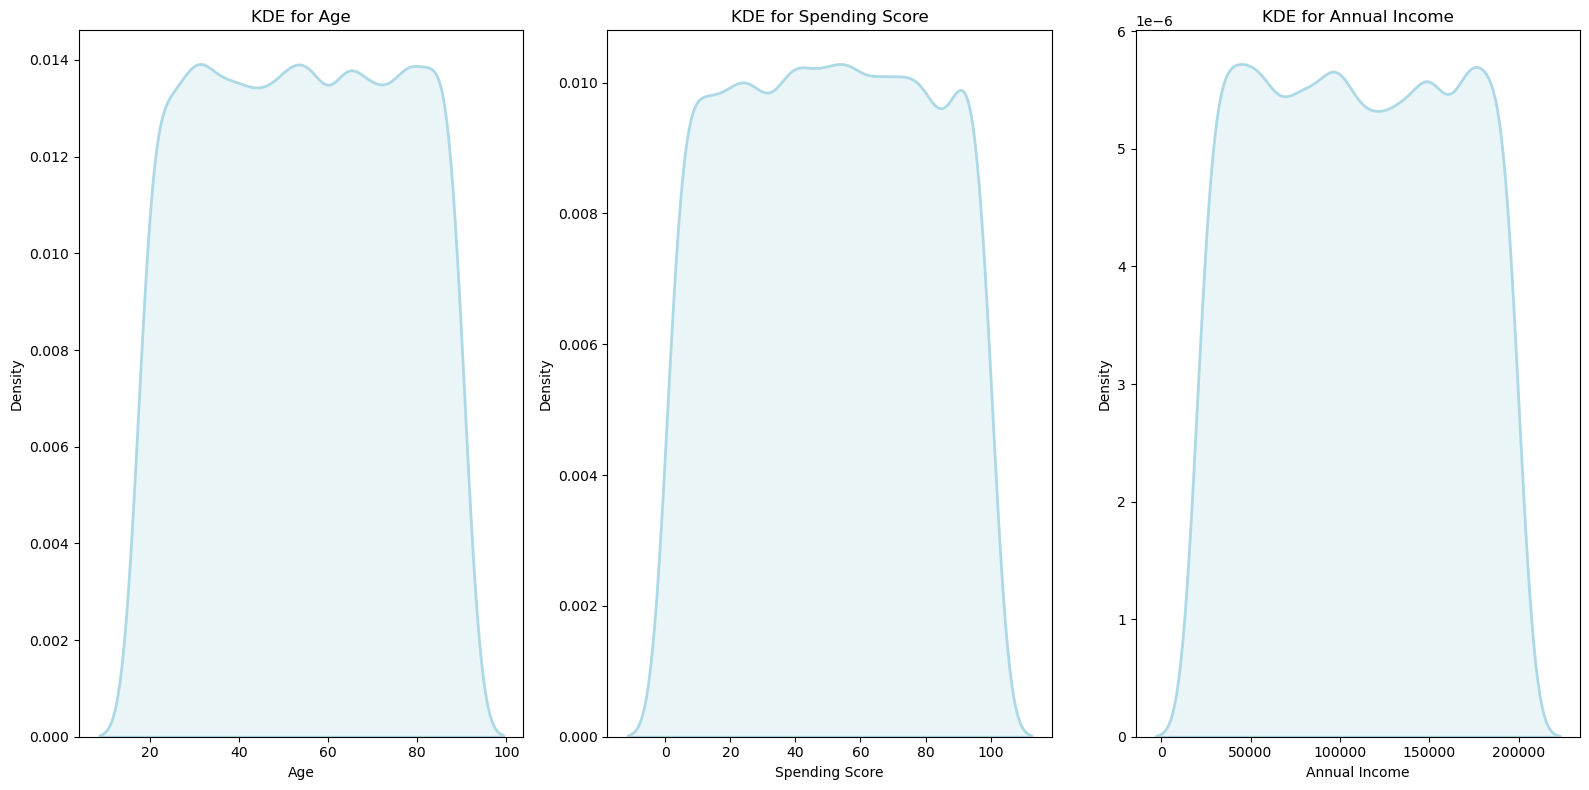

In [45]:
# KDE plot for Numerical Features

# Create subplots
fig, ax = plt.subplots(1, len(rmallNum.columns), figsize=(16, 8))

# Define a color for the KDE
kde_color = "lightblue"

# Plot a KDE for each column
for i, col in enumerate(rmallNum.columns):
    sns.kdeplot(rmallNum[col], ax = ax[i], fill = True, color = kde_color, linewidth = 2)
    ax[i].set_title(f'KDE for {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Density")

# Adjust layout
plt.tight_layout()
plt.show()

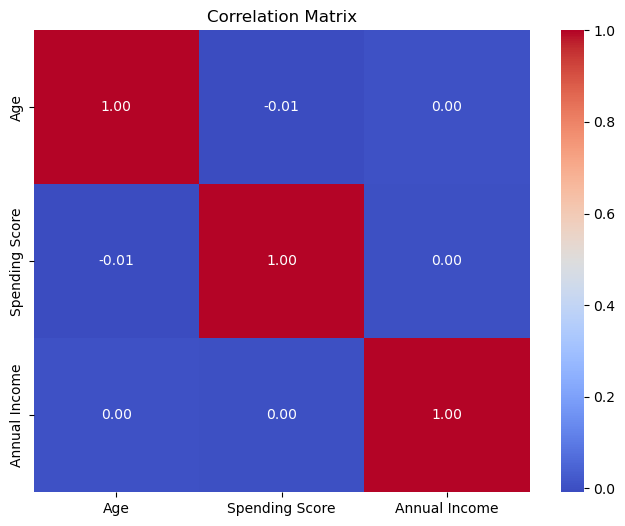

In [46]:
# Plot the correlation matrix of the main numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(rmallNum.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

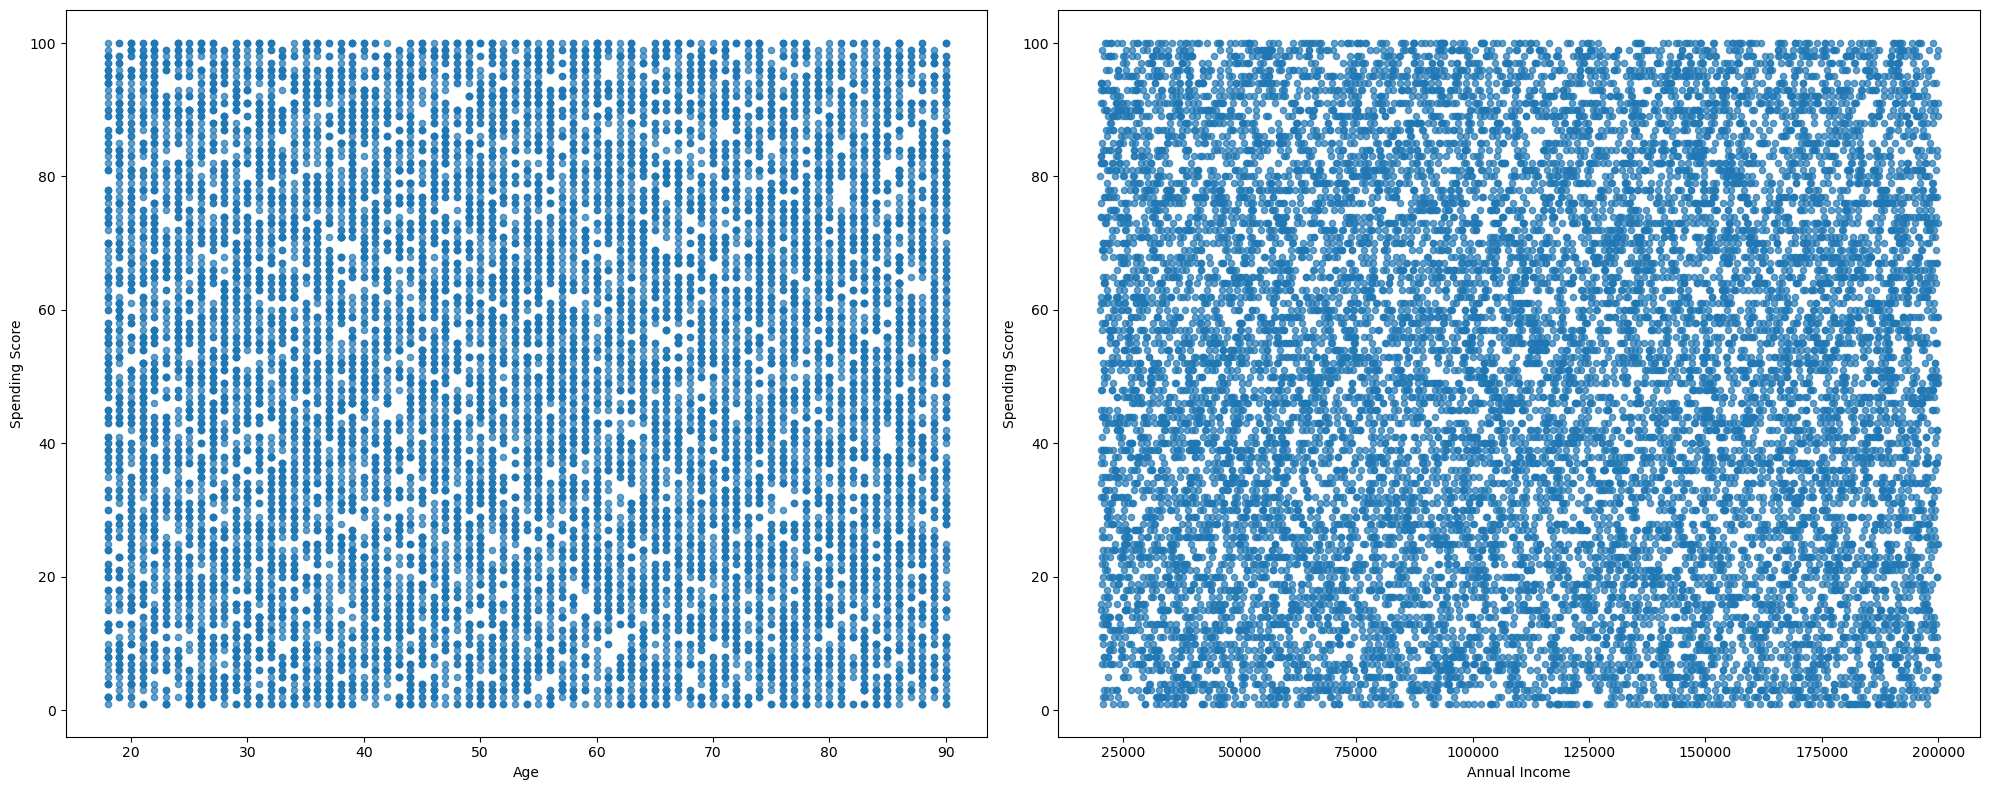

In [47]:
# Plot scatter plots for each main features against "Spending Score"
# Mask out Spending Score
rMallnum = rmallNum.drop(columns = "Spending Score")

# Create subplots
fig, ax = plt.subplots(1, len(rMallnum.columns), figsize=(20, 8))

# Plot scatter
for i, col in enumerate(rMallnum.columns):
    mall.plot.scatter(x=col, y="Spending Score", ax=ax[i], alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

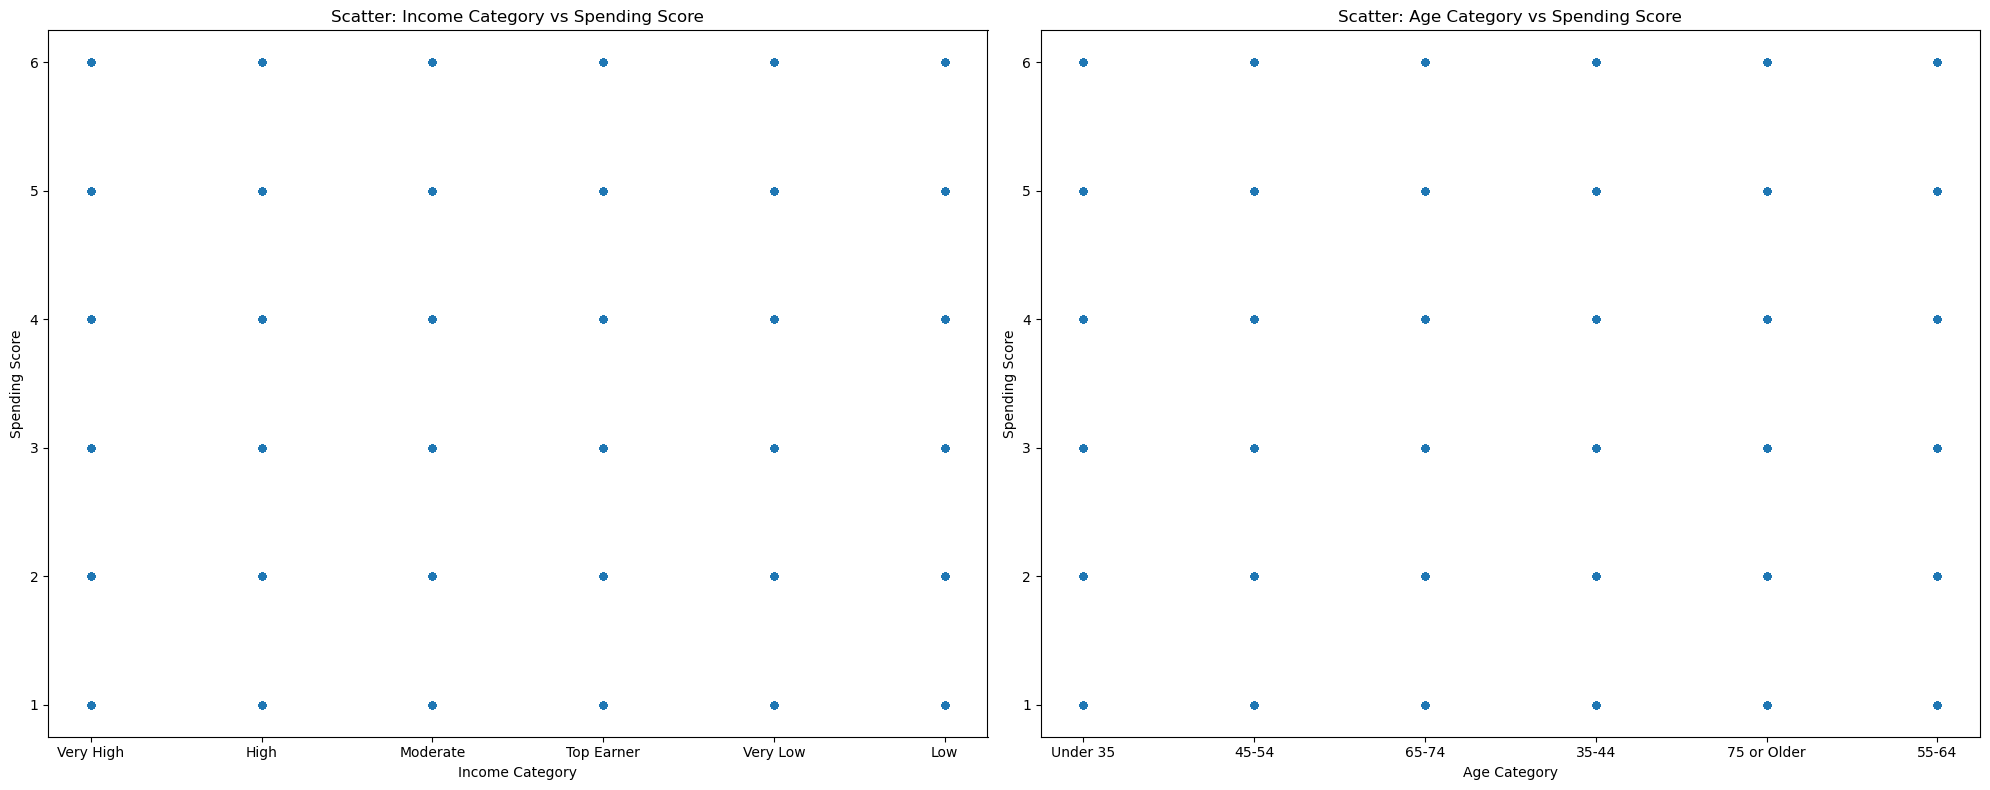

In [48]:
# Define needed columns for correlation analysis
nmallNum = mall[["Income Category", "Age Category"]]

# Define labels for incomeCat and ageCatEncod
income_labels = ["Very Low", "Low", "Moderate", "High", "Very High", "Top Earner"]
age_labels = ["Under 35", "35-44", "45-54", "55-64", "65-74", "75 or Older"]

# Create subplots
fig, ax = plt.subplots(1, len(nmallNum.columns), figsize=(20, 8))

# Plot scatter plots for each column against "Spending Score"
for i, col in enumerate(nmallNum.columns):
    mall.plot.scatter(x=col, y="Spending Score Cat", ax=ax[i], alpha=0.7)

    # Set custom x-axis labels based on the column
    if col == "Income Category":
        ax[i].set_xticks(nmallNum[col].unique())  # Get unique income categories
        ax[i].set_xticklabels(income_labels)  # Set custom income labels
        ax[i].set_xlabel("Income Category")
        ax[i].set_title("Scatter: Income Category vs Spending Score")
        
    elif col == "Age Category":
        ax[i].set_xticks(nmallNum[col].unique())  # Get unique age categories
        ax[i].set_xticklabels(age_labels)  # Set custom age labels
        ax[i].set_title("Scatter: Age Category vs Spending Score")
        ax[i].set_xlabel("Age Category")
    else:
        ax[i].set_xlabel(col)

    
    ax[i].set_ylabel("Spending Score")

# Adjust layout
plt.tight_layout()
plt.show()

In [49]:
# Transform the needed columns for clustering
mall["Annual Income"] = np.log1p(mall["Annual Income"])
mall["Spending Score"] = np.log1p(mall["Spending Score"])

# Select features for clustering
X = mall[["Annual Income", "Spending Score"]]
X.head()

,Annual Income,Spending Score
0,11.928209,4.499810
1,12.128592,4.564348
2,11.169209,4.343805
3,10.923435,4.060443
4,11.943103,4.343805


In [50]:
# Scale the selected features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Put `X_scaled` into DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()

,Annual Income,Spending Score
0,0.879313,0.970599
1,0.966386,0.987054
2,0.549501,0.930822
3,0.442704,0.858572
4,0.885785,0.930822


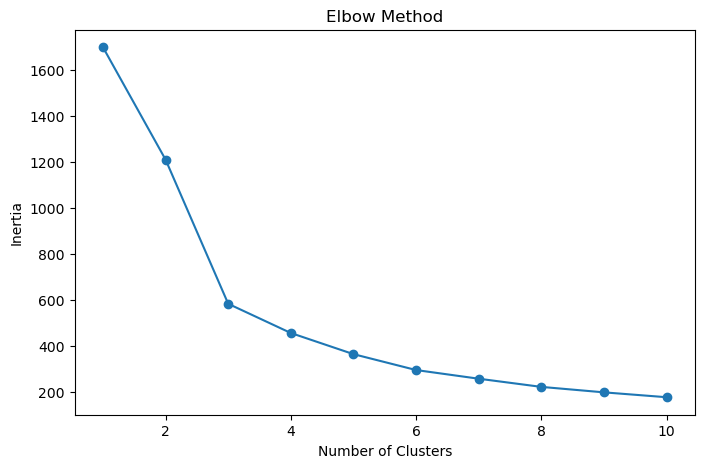

In [51]:
# Find the optimal number of cluster for analysis
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the error per cluster
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [52]:
# Instantiate the kmeans Clustering Algorithm
kmeans = KMeans(init = "random", max_iter = 20, n_clusters = 3, random_state = 42)

# Fit the algorithm
kmeans.fit(X_scaled)

KMeans(init='random', max_iter=20, n_clusters=3, random_state=42)

In [53]:
# Calculate silhouette score and inertia error

# Get predictions
mall["Cluster"] = kmeans.fit_predict(X_scaled)

# Calculate score and error
kmeansScore = silhouette_score(X_scaled, kmeans.labels_)
print("The Kmeans silhouette score is", round(kmeansScore, 2))
print("The Kmeans inertia error is", round(kmeans.inertia_, 2))

The Kmeans silhouette score is 0.47
The Kmeans inertia error is 584.67


In [56]:
# Create Cluster_Label for readability

def map_cluster_to_label(cluster_num):
    if cluster_num == 0:
        return "Target Customers"  # High spenders, high income
    elif cluster_num == 1:
        return "Saver Customers"   # Low spenders, high income
    elif cluster_num == 2:
        return "High Spenders"    # High spenders, high income
    else:
        return "Unknown"

mall["Cluster_Label"] = mall["Cluster"].apply(map_cluster_to_label)
mall.tail()

,Age,Gender,Annual Income,Spending Score,AgeCat,Spending Score Cat,Age Category,Income Category,Cluster,Cluster_Label
15074,29,Female,11.489902,3.433987,Under 35,2,1,3,2,High Spenders
15075,22,Male,11.203161,4.317488,Under 35,5,1,3,1,Saver Customers
15076,18,Female,11.629267,3.891820,Under 35,3,1,4,2,High Spenders
15077,26,Female,11.454374,1.791759,Under 35,1,1,3,0,Target Customers
15078,19,Male,11.265054,1.098612,Under 35,1,1,3,0,Target Customers


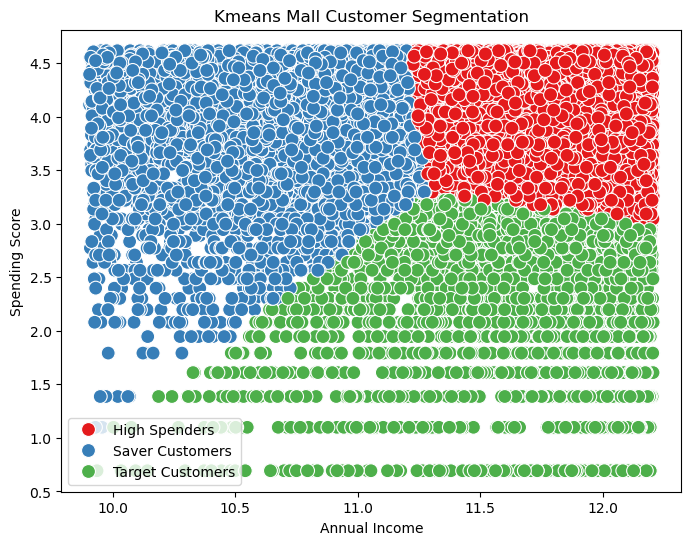

In [55]:
# Create a scatterplot with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=mall["Annual Income"],
    y=mall["Spending Score"],
    hue=mall["Cluster_Label"],
    palette="Set1",
    s=100
)

# Calculate cluster centers (centroids) for numeric columns only
cluster_centers = mall.groupby('Cluster').mean(numeric_only=True)

# Visualize the cluster
plt.title("Kmeans Mall Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()